# __Classification__

## Supervised Learning

### Agenda

- Classification
- Application of Classification
- Types of Classification
- Binary Classification
  * Logistic Regression
    - Mathematical Concept of Logistic Regression
    - Example with Breast Cancer Dataset
  * PErformance Merics used in Classification
     - Significance of Confusion Matrix
  * Naive bayes Classifier
     - Mathematical Concept of Naive Bayes
     - Applying Naive Bayes Algorithm on Breast Cancer Dataset
  * K Nearest Neighbour (KNN)
     - Applying K-Nearest Neighbour or Breast Cancer Dataset
     - Hyperparameter Tuning KNN
  * Decision Tree
     - How Decision Tree works
     - Metrics for Splitting
     - Pruning
     - Applying Decision Tree on Breast Cancer Dataset
     - Hyperparameter Tuning in Decision Tree
  * Support Vector Maching (SVM)
     - Applying SVM on Breast Cancer Dataset
     - Hyperparameter Tuning

### Classification
It is a supervised ML technique where the model is trained to predict the class label of a given inputs data. It looks for a decision boundary which divides the dataset into different classes.<br> In other words when the target variable has a finite set of discrete values (text or numbers) or the target variable is a categorical variable. We use classification ML techniques to analyse and predict the target variable. <br> Classification Algorithms categorize data into distinct classes or categories

#### Application
- Healthcare: Diagnose Diseases, Assess Risk
- Finance: Identifying Customer Risk Profile for Depts, Fraud Detection
- Marketing: Customer Segmentation, Target Marketing
- Retail Industry: Inventory Management, Product Recommendations
- Manufacturing: Product Quality Check(Quality control), Equipment fault Detection

#### Types of Classification
* Binary Classification: The model predicts one of the two possible outcomes. Popular alogrithms in binary classification are
  - Logistic Regression (Typically recommended only for binary class Classification)
  - Naive Bayes
  - K Nearest Neighbour
  - Decision Tree
  - Support Vector Machine

* Multi Class Classification
* Multi Label Classification (Only Implemented through Deep Learning - Example: Object Detection)
* Imbalanced Classification (Anomaly Detection)
  

#### Logistic Regression

It is a supervised machine learning technique primarily used for binary classification. In this method, we apply sigmoid function to the linear combination of independent variables/predictors(Featues). this produces a probability value between 0 and 1. This probability represents the likelihood of a datapoint belonging to a specific class (eg: Positive or Negitive outcome)

If the estimated pribability is greater than equal to 0.5, then the model predicts that the instance belongs to a positive class labeled "1" or else it predicts that it does not (i.e. it belongs to negitive class, labelled "0"), This makes it a binary classifier.

### Mathematical Concept of Logistic Regression 
** 1. Logistic Function (Sigmoid Function):**
The core logistic Regression is the logistic function, also known as the sigmoid function (Denoted by $\sigma(z)$), which maps any real-valued number into the range(0,1)

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

where,
'z' is al linear combination of the input features. This function outputs the probability of the inpput belonging to the positive class (class 1).

**2. Linear Combination of Inputs:**
The input feature X are combined linearly using weights w and a bias term b:

$$
z = w \cdot X + b
$$

**3. Predictions:**
The logistic Regression model predicts the probability of the classs being positive or negitive (Class 1 or 0) as:

$$
\sigma(z) = P(y=1 \mid X) = \sigma(z) = \frac{1}{1 + e^{-(w \cdot X+ b)}} 
$$

To make a final binary decision a threshold(usually 0.5) is applied to the probability . If $\sigma(z)$ >= 0.5 the prection is class 1, otherwise its a class 0.

**4. Cost Function:**
The cost dunction used in logistic regression in the binary cross-entropy(log loss), which measures the discrepency between the predicted probabilities and actual classs labels:
$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y_{(i)} \log(\hat{y}_{(i)}) + (1 - y_{(i)}) \log(1 - \hat{y}_{(i)}) \right]
$$

Where
𝑚 is the number of training examples, $y_{(i)}$ is the true label, and $\hat{y}_{(i)}$ is the predicted probability for the 𝑖-th example.

**5. Optimization:**
The goal is to find the weights 𝑤 and bias 𝑏 that minimize the cost function. This is typically done using gradient descent.




In [1]:
### Implement Logistic Regression on Breast Cancer Data

In [2]:
#### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#### Read the data

df = pd.read_csv('breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#### Dropping Irrelavant column

df = df.drop(columns = ['id', 'Unnamed: 32'])

In [7]:
#### Statistical Summary

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: ylabel='Density'>

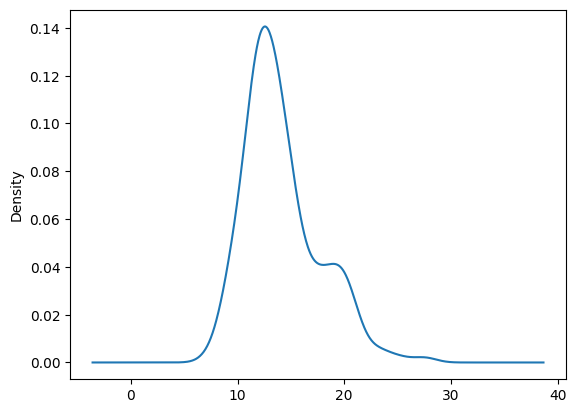

In [8]:
#### **NOTE**

df.radius_mean.plot.kde()   #Checking the Skweness of the variable.

# We have to check the skewness of all the variable.
# To check skewness =  3(Mean-meadian)/Standard Deviation
# If mean is greater than median we get +ve result it is positively skewed 
# If Median is greater than mean then we get -ve result and it is negitively skewed

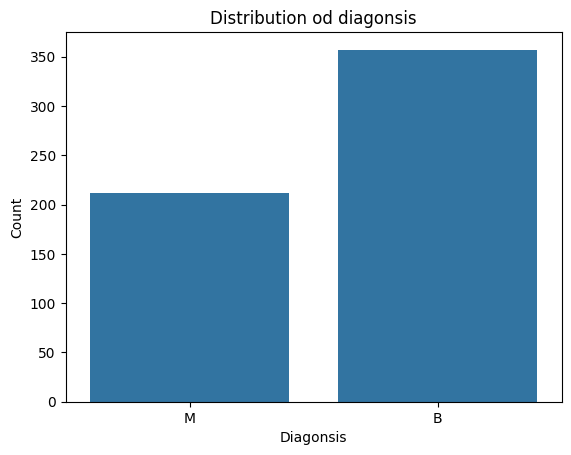

In [9]:
#### Distribution of Target variables

sns.countplot(x = 'diagnosis', data = df)
plt.title('Distribution od diagonsis')
plt.xlabel('Diagonsis')
plt.ylabel('Count')
plt.show()

In [10]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

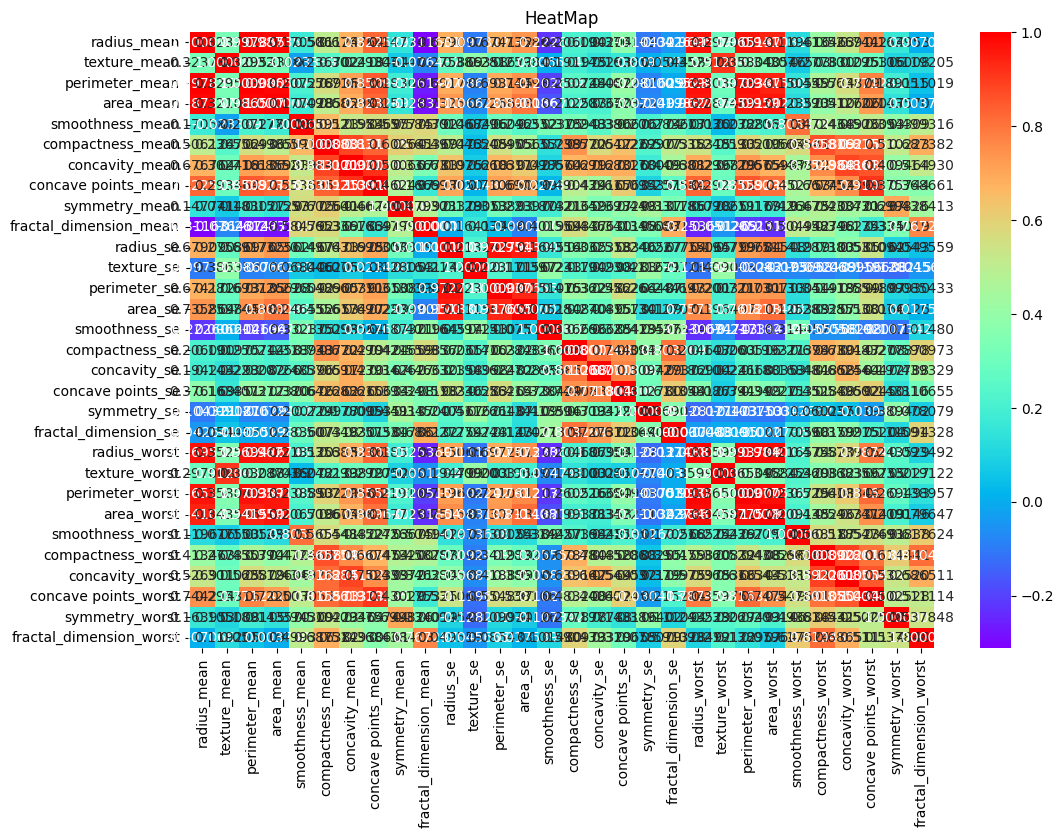

In [11]:
#### Plot a correlation map to understand the correlation between the features

plt.figure(figsize = (12,8))
c = df.corr(numeric_only = True)
sns.heatmap(c, annot =  True, fmt = '1f', cmap = 'rainbow')
plt.title('HeatMap')
plt.show()

In [12]:
#### label Encode the Target variable diagnosis

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['diagnosis'] = enc.fit_transform(df['diagnosis'])
df['diagnosis']

# M = 1
# B = 0

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [13]:
#### Extract Features and Target and perform train test split 

X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .2, random_state = 25)

In [14]:
#### Create a pipeline of Statdard Scaler followed by Logistic Regression

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('log_reg', LogisticRegression(random_state = 25))
])



#### Fit the pipeline to the train Data

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=25))])

In [15]:
#### Pridict on Training Set and Test Set

y_pred_train_log_reg = pipeline.predict(X_train)
y_pred_test_log_reg = pipeline.predict(X_test)

In [16]:
#### Predict the probabilites on testing set

y_pred_test_prob_log_reg = pipeline.predict_proba(X_test)[:,1]

# M = 1
# B = 0

In [17]:
#### Probability output

pipeline.predict_proba(X_test)

# M = 1
# B = 0

array([[9.99980585e-01, 1.94152200e-05],
       [9.99698267e-01, 3.01733326e-04],
       [9.99964607e-01, 3.53926159e-05],
       [9.98668442e-01, 1.33155776e-03],
       [9.86787106e-01, 1.32128939e-02],
       [9.99999469e-01, 5.30547332e-07],
       [9.99990292e-01, 9.70766039e-06],
       [9.99998048e-01, 1.95197523e-06],
       [9.99831920e-01, 1.68080232e-04],
       [9.95709012e-01, 4.29098784e-03],
       [9.95147686e-01, 4.85231446e-03],
       [9.99990151e-01, 9.84860925e-06],
       [1.56919294e-04, 9.99843081e-01],
       [1.55806109e-06, 9.99998442e-01],
       [3.21523552e-04, 9.99678476e-01],
       [9.33654339e-01, 6.63456611e-02],
       [9.08676691e-01, 9.13233091e-02],
       [9.99883896e-01, 1.16104076e-04],
       [9.99986474e-01, 1.35259036e-05],
       [5.66423720e-05, 9.99943358e-01],
       [9.84385415e-01, 1.56145852e-02],
       [9.99982041e-01, 1.79589953e-05],
       [9.99985494e-01, 1.45058651e-05],
       [1.45411178e-04, 9.99854589e-01],
       [3.074365

In [18]:
#### Creating Df of Results

results_df = pd.DataFrame({
    'Actual Label' : y_test,
    'Predicted Label' : y_pred_test_log_reg,
    'Predicted Probability of Malignant' : np.round(y_pred_test_prob_log_reg, 4)
})

In [19]:
results_df.tail(10)

,Actual Label,Predicted Label,Predicted Probability of Malignant
118,1,1,1.0000
205,1,1,0.6616
138,1,1,0.9992
338,0,0,0.0001
389,1,1,0.9998
346,0,0,0.0005
158,0,0,0.0001
53,1,1,0.9991
387,0,0,0.0003
360,0,0,0.0000


In [20]:
#### Calculate training and testing accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)


print('Logistic Regression')
print('------------------------------------')
print(f'Training Accuracy : {training_accuracy}')
print(f'Testing Accuracy : {testing_accuracy}')

Logistic Regression
------------------------------------
Training Accuracy : 0.989010989010989
Testing Accuracy : 0.9649122807017544


The training Accuracy is 98% and testing Accuracy is 96%.
We can say that the model has learnt well and implemented very well on the unseen data.
The model is performance very very well.
The model is performing almost same on seen and unseen data.




### Performance Matrix used in Classification

 A performance evaluation matrix, often referred to as a confusion matrix in the context of classification problems, is a tool used to assess the performance of a predictive model by comparing the actual outcomes with the predicted outcomes.

- It is a tabular representation that allows you to visualize the accuracy and errors of the model in detail.

A confusion matrix is typically a 2x2 matrix as shown below:

The matrix includes the following components:
- **True Positive (TP):** The number of instances where the model correctly predicted the positive class.
- **True Negative (TN):** The number of instances where the model correctly predicted the negative class.
- **False Positive (FP):** The number of instances where the model incorrectly predicted the positive class (Type I error).
- **False Negative (FN):** The number of instances where the model incorrectly predicted the negative class (Type II error)

The provided confusion matrix provides a summary of the effectiveness of COVID-19 tests that identify individuals with the virus and those without it.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Classification_Part_1/image_4.jpg)

Let us compare the patient’s test result to the terms used in the confusion matrix.

- **True Positive (TP):** The case is correctly classified as positive. (The test result and the patient's condition match.)

  eg. The model predicts that a patient has COVID and the test result confirms that the patient has the disease, it's a true positive.


- **True Negative (TN):** The case is correctly classified as negative. (The test result and the patient's condition match.)

  eg. The model predicts that a patient does not have COVID and the test result confirms that the patient does not have the disease, it's a true negative.


- **False Positive (FP):** The case is actually negative but is falsely classified as positive. (The result from the test and the patient's condition do not match.)

  eg. The model predicts that a patient has COVID but the test results confirm that patient does not have the disease, it's a false positive.


- **False Negative (FN):** The case is actually positive but is falsely classified as negative.

  eg. The model predicts that a patient does not have COVID but the test results confirm that patient actually has the disease, it's a false negative.


### __4.2 Significance of the Confusion Matrix__

The confusion matrix provides the foundation for various evaluation metrics, which are crucial for understanding different aspects of model performance. These metrics include:

- Accuracy
- Precision
- Recall(Sensitivity or True Positive Rate)
- F1 Score
- Specificity(True Negative Rate)

### __Accuracy__

The ratio of correctly predicted instances (both positive and negative) to the total instances.



```
# This is formatted as code
```

  $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$


Where:
   - \(TP\) = True Positives
   - \(TN\) = True Negatives
   - \(FP\) = False Positives
   - \(FN\) = False Negatives

### __Precision__

The ratio of correctly predicted positive instances to the total predicted positive instances.
- It indicates the quality of positive predictions.
- It is a performance metric used for pattern recognition and classification in machine learning.
- It is a good metric when the cost of a false positive is high.


  $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

### __Recall (Sensitivity or True Positive Rate)__


The ratio of correctly predicted positive instances to all actual positive instances.

- It measures the model's ability to detect positive samples. The higher the recall, the more positive samples it detects.
- It is a very useful metric when the cost of a false negative is high.


   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

### __F1 Score__

The harmonic mean of precision and recall. It provides a single metric that balances the trade-off between precision and recall.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### __Specificity (True Negative Rate)__

The ratio of correctly predicted negative instances to all actual negative instances.
- It indicates how well the model can identify negative instances.

   $$
   \text{Specificity} = \frac{TN}{TN + FP}
   $$

### __ROC Curve__  (Reciever Operating Characteristics)

An ROC curve is a graphical representation of a classification model’s performance across different classification thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at various threshold settings.

True Positive Rate (TPR) or Recall:
$$ \text{TPR} = \frac{TP}{TP + FN} $$


False Positive Rate (FPR):

$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$


**Finding the Optimal Threshold:**

The default threshold for many classification algorithms is 0.5, meaning if the predicted probability is greater than 0.5, the instance is classified as positive. However, this threshold may not always be optimal, especially in cases with skewed class distributions or when the costs of false positives and false negatives are unequal.

**Methods to Find the Optimal Threshold:**

1. *Maximizing Youden’s J Statistic*:

  Youden's J statistic is defined as
  $J=TPR−FPR$. The optimal threshold is where this statistic is maximized. This method balances the TPR and FPR, aiming to maximize the true positives while minimizing the false positives.

2. *Closest Point to (0, 1)*:

  Another method is to find the point on the ROC curve that is closest to the top-left corner (0, 1), representing the ideal classifier with TPR = 1 and FPR = 0.



### __AUC (Area Under the ROC Curve)__

The AUC is a single scalar value that summarizes the overall performance of a classifier.

AUC Value:
- An AUC of 0.5 suggests no discrimination, meaning the model performs no better than random chance.
- An AUC of 1.0 indicates perfect discrimination, meaning the model perfectly distinguishes between positive and negative classes.

In [21]:
#### Importing Libraries 

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

In [22]:
conf_mat = confusion_matrix(y_test, y_pred_test_log_reg)
print('Confusion Matrix')
print(conf_mat)

Confusion Matrix
[[74  1]
 [ 3 36]]


In [23]:
#### Displaying Confusion Matrix in heatmap form

cm_display = ConfusionMatrixDisplay( rix = conf_mat, display_labels= ['Benign','Malignant'])
cm_display.plot(colorbar = False)
plt.show()

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'rix'

In [ ]:
#### Classification Report

print('Classification Report : Logistic Regression')
print('-----------------------------------------------------------')
print(classification_report(y_test, y_pred_test_log_reg))

__Precision, Recall, Accuracy__

- **We need to have High Precision, High Recall and High Accuracy for both 0 and 1 then we can say that our model is good**

- **If we have High Accuracy and we have low precision or low Recall for either 0 or 1 then we can say that we have some issue with the data and the data is inclined towards it.**

- **We need to understand if 96% accuracy is good as per the domain we are working on and accordinly take decisions**

In [ ]:
### __Support__

y_test.value_counts()

# It is the count of 0's and 1's used in the model

In [ ]:
####  Plot ROC Curve

### Compute FPR, TPR at different Threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_test_prob_log_reg)

### Compute Area under Curve (AUC)

roc_auc = auc(fpr, tpr)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
tpr - fpr

In [ ]:
threshold

In [ ]:
### Compute  Youden J Statistic

y_j = tpr-fpr

optimal_threshold_index = np.argmax(y_j)
optimal_threshold = threshold[optimal_threshold_index]
print(f'Optimal Threshold : {optimal_threshold:.4f}')

In [ ]:
#### Plot ROC curve with Optimal Threshold Marked

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC Curve (AUC = {roc_auc:.4f}')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color = 'red', marker = '*',
            label = f'Optimal Threshold {optimal_threshold:.2f}')
plt.plot([0,1], [0,1], ls = '--', lw = 2, color = 'cyan')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Reciever operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Naive Bayes Classifier

- Naive bayes is problistic classsifier based on Bayes Theroem. It is called as Naive because it assumes that the input variables are independent of eachother, which is a strong assumption for real world data
- Performs perticularly well with large datasetswith multiclass classification
- Typically used in text classification, sentiment analysis etc

Mathmatically:
$$
P(A|B) = \frac{P(B|A) \times p(A)}{P(B)}
$$

where: <br>
**P(A|B)** is the probability of event A happening provided event B has occured<br>
**P(A)**,**P(B)** are independent probabilities of event A and event B<br>
**P(B|A)** is the probability of event B happening provided event Ahas occured<br>

In [ ]:
#### Implement Naive Bayes using Breast Cancer Data

from sklearn.naive_bayes import GaussianNB

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())    
])


pipeline.fit(X_train, y_train)

In [ ]:
#### Predictions

y_pred_train_nb = pipeline.predict(X_train)
y_pred_test_nb = pipeline.predict(X_test)

In [1]:
#### Predict the probabilities on test set

y_pred_test_prob_nb = pipeline.predict_proba(X_test)[:,1]

#### Create DataFrame for result

result_df = pd.DataFrame({
    'Actual label' : y_test,
    'Predicted label' : y_pred_test_nb,
    'Predicted Probability of 1' : np.round(y_pred_test_prob_nb, 4)
})

result_df.head(30)

NameError: name 'pipeline' is not defined

In [ ]:
#### Calculate training and testing accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)


print('Naive Bayes')
print('------------------------------------')
print(f'Training Accuracy : {training_accuracy}')
print(f'Testing Accuracy : {testing_accuracy}')

In [31]:
conf_mat_nb = confusion_matrix(y_test, y_pred_test_nb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat_nb, display_labels = ['Benign','Malignant'])
cm_display.plot(colorbar = False)
plt.show()

NameError: name 'y_pred_test_nb' is not defined

In [ ]:
print(classification_report(y_test, y_pred_test_nb))

In [ ]:
####  Plot ROC Curve

### Compute FPR, TPR at different Threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_test_prob_nb)

### Compute Area under Curve (AUC)

roc_auc = auc(fpr, tpr)

### Compute  Youden J Statistic

y_j = tpr-fpr

optimal_threshold_index = np.argmax(y_j)
optimal_threshold = threshold[optimal_threshold_index]
print(f'Optimal Threshold : {optimal_threshold:.4f}')


#### Plot ROC curve with Optimal Threshold Marked

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC Curve (AUC = {roc_auc:.4f}')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color = 'red', marker = '*',
            label = f'Optimal Threshold {optimal_threshold:.2f}')
plt.plot([0,1], [0,1], ls = '--', lw = 2, color = 'cyan')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Reciever operating Characteristic (ROC) Curve Gaussian NB')
plt.legend()
plt.show()

### __K Nearest Neighbours (KNN)__

The K Nearest Neighbour(KNN) - relies on the idea that similar datapoints tend to have similar labels/values.
Steps Followed

- Choose the value of K, whcich represent the number of nearest neighbour to consider (Must be any positive integer)
- For everypoint in the test data:
    * Calcualte the distance between the test data point and each data         point in the training set usually through euclidean distance            metric
    * Sort the distance calculated is ASC order
    * Select top K closest DAta points
    * Assign most frequent class (Classification), Average (Regression)       from the chosen top K points

In [ ]:
#### Implement KNN using Breast Cancer Data

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = 5))    
])


pipeline.fit(X_train, y_train)

In [ ]:
#### Predictions

y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [ ]:
#### Predict the probabilities on test set

y_pred_test_prob_knn = pipeline.predict_proba(X_test)[:,1]

#### Create DataFrame for result

result_df = pd.DataFrame({
    'Actual label' : y_test,
    'Predicted label' : y_pred_test_knn,
    'Predicted Probability of 1' : np.round(y_pred_test_prob_knn, 4)
})

result_df.head(10)

In [ ]:
#### Calculate training and testing accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)


print('K Nearest Neighbors')
print('------------------------------------')
print(f'Training Accuracy : {training_accuracy}')
print(f'Testing Accuracy : {testing_accuracy}')

In [ ]:
conf_mat_nb = confusion_matrix(y_test, y_pred_test_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat_nb, display_labels = ['Benign','Malignant'])
cm_display.plot(colorbar = False)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test_knn))

In [ ]:
####  Plot ROC Curve

### Compute FPR, TPR at different Threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_test_prob_knn)

### Compute Area under Curve (AUC)

roc_auc = auc(fpr, tpr)

### Compute  Youden J Statistic

y_j = tpr-fpr

optimal_threshold_index = np.argmax(y_j)
optimal_threshold = threshold[optimal_threshold_index]
print(f'Optimal Threshold : {optimal_threshold:.4f}')


#### Plot ROC curve with Optimal Threshold Marked

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC Curve (AUC = {roc_auc:.4f}')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color = 'red', marker = '*',
            label = f'Optimal Threshold {optimal_threshold:.2f}')
plt.plot([0,1], [0,1], ls = '--', lw = 2, color = 'cyan')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Reciever operating Characteristic (ROC) KNN')
plt.legend()
plt.show()

In [59]:
#### Hyper parmeter tuning for KNN

from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
param_grid = {"knn__n_neighbors" : np.arange(1,21)}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

search = GridSearchCV(pipeline, param_grid, cv = 10, scoring = 'accuracy')
search.fit(X_train, y_train)

In [ ]:
print(f"Best Parameters {search.best_params_} ")
print(f'Best Score {search.best_score_}')

In [ ]:
optimal_k = search.best_params_['knn__n_neighbors']
print(optimal_k)

pipeline_knn = Pipeline ([
    ('scalar', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = optimal_k))
])

pipeline_knn.fit(X_train, y_train)

print(f'Accuracy Score {accuracy_score(y_test, pipeline_knn.predict(X_test))}')

In [ ]:
#### Class Validation Result

cv_results = search.cv_results_
cv_results

In [ ]:
#### Plot the cross Validation accuracy for different K value

plt.plot(param_grid['knn__n_neighbors'], cv_results['mean_test_score'], marker = 'o')
plt.show()

### __Decision Tree Classifiers__

A non parametic alogirthm that can be utilized for both **Regression** and **Classification**. It creates heirrarchical tree structure consist of root node, leaf node, internal node and branches

#### Working Mechanism
- Select the best feature that best splits the data using matrics like  *Gini Impurity, Entropy, Information Gain*.
- Split the Dataset: Dataset futher divided into subsets and best feature of each subsets is used again to do further splits.
- Repeat the steps above untill you reach to target value.

__Gini Impurity__<br>
This matric measures the liklihood of incorrectly classifying a randomly choosen element. It ranges from 0 to (Perfect purity) to 0.5(Maximum impurity in binary classification). This is calculated by 

$$
\text{Gini} = 1 - \sum_{i=1}^{n}(p_i)^2
$$

__Entropy__<br>
It qualitfies the amount of uncertainity or impurity in the dataset. It is calculated by

$$
\text{Entropy} = -\sum_{i=1}^{n}p_i\log_2(p_i)
$$

__Information Gain__<br>
It is a matric that measure the reduction in Gini/Entropy after the dataset has been split on an feature. This is calculated by

$$
\text{Information Gain} = \text{Entropy(parent)}- \sum_{i=1}^{n} \left( \frac{|D_i|}{|D|} \times \text{Entropy}(D_i) \right)
$$

*Where Di is the subset of D, after being split by the attribute*

__Pruning__<br>
Removing the parts of the tree that are insignificant. Two ways to deal with are prepruning(Early stopping) and post pruning.

- __PrePruning(Early stopping)__ : Allows to set a hyperparameter max_depth to conrol the depth of the tree or another hyperparameter min sample leaf can be used

- __PostPruning__ : Let the tree grow in full and then remove nodes that have little predicitve power

In [26]:
# Applying Decision Tree (DT) for Breast Cancer Data

from sklearn.tree import DecisionTreeClassifier

In [27]:
pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [28]:
y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

#### Calculate training and testing accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_dt)
testing_accuracy = accuracy_score(y_test, y_pred_test_dt)


print('Decision Tree')
print('------------------------------------')
print(f'Training Accuracy : {training_accuracy}')
print(f'Testing Accuracy : {testing_accuracy}')

Decision Tree
------------------------------------
Training Accuracy : 1.0
Testing Accuracy : 0.9298245614035088


In [30]:
#### Predict the probabilities on test set

y_pred_test_prob_dt = pipeline.predict_proba(X_test)[:,1]

#### Create DataFrame for result

result_df = pd.DataFrame({
    'Actual label' : y_test,
    'Predicted label' : y_pred_test_dt,
    'Predicted Probability of 1' : np.round(y_pred_test_prob_dt, 4)
})

result_df.tail(10)

,Actual label,Predicted label,Predicted Probability of 1
118,1,1,1.0
205,1,1,1.0
138,1,1,1.0
338,0,0,0.0
389,1,1,1.0
346,0,0,0.0
158,0,0,0.0
53,1,1,1.0
387,0,0,0.0
360,0,0,0.0


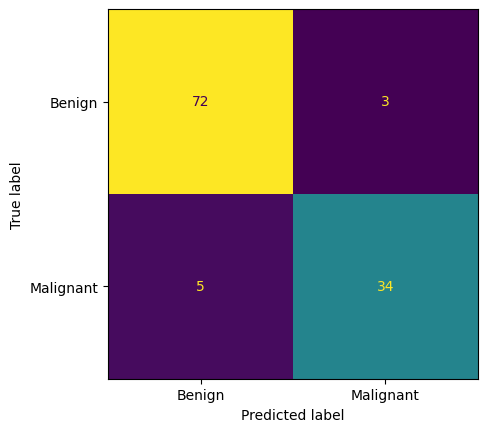

In [34]:
conf_mat_dt_train = confusion_matrix(y_test, y_pred_test_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat_dt_train, display_labels = ['Benign','Malignant'])
cm_display.plot(colorbar = False)
plt.show()

In [48]:
from sklearn.tree import export_text, plot_tree

sc = StandardScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.fit_transform(X_test)

In [56]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
model.fit(X_train_new, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [57]:
print(export_text(model))

|--- feature_22 <= -0.02
|   |--- feature_27 <= 0.29
|   |   |--- feature_14 <= -1.22
|   |   |   |--- feature_21 <= 0.20
|   |   |   |   |--- class: 0
|   |   |   |--- feature_21 >  0.20
|   |   |   |   |--- class: 1
|   |   |--- feature_14 >  -1.22
|   |   |   |--- class: 0
|   |--- feature_27 >  0.29
|   |   |--- feature_21 <= 0.47
|   |   |   |--- feature_28 <= 1.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_28 >  1.06
|   |   |   |   |--- class: 1
|   |   |--- feature_21 >  0.47
|   |   |   |--- class: 1
|--- feature_22 >  -0.02
|   |--- feature_22 <= 0.36
|   |   |--- feature_24 <= 0.15
|   |   |   |--- feature_21 <= -0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_21 >  -0.01
|   |   |   |   |--- class: 1
|   |   |--- feature_24 >  0.15
|   |   |   |--- class: 1
|   |--- feature_22 >  0.36
|   |   |--- class: 1



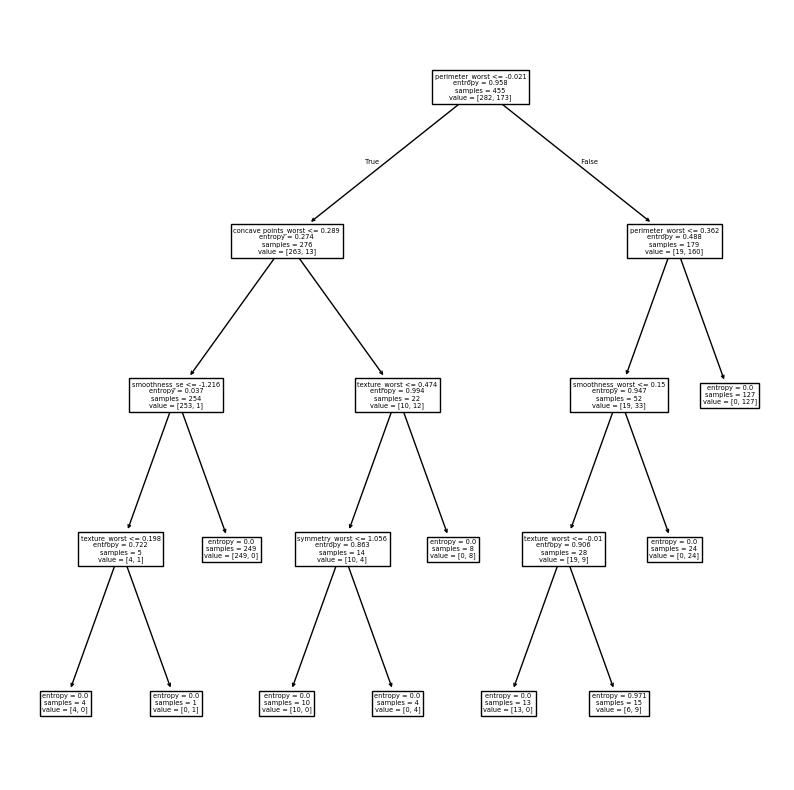

In [58]:
plt.figure(figsize = (10,10))
plot_tree(model, feature_names = X_train.columns)
plt.show()

### If the model is getting overfitted then apply pruning.

In [63]:
#### Hyperparameter Tuning for DT

param_grid = {"dt__criterion" :['gini', 'entropy'],
             'dt__max_depth' : [4,5,6],
             'dt__min_samples_leaf' : [1,2]}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

search = GridSearchCV(pipeline, param_grid, cv = 10, scoring = 'accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [4, 5, 6],
                         'dt__min_samples_leaf': [1, 2]},
             scoring='accuracy')

In [64]:
search.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 4, 'dt__min_samples_leaf': 2}

In [65]:
search.best_score_

np.float64(0.9472946859903383)

In [68]:
print(f'Accuracy Score on Tuned DT : {accuracy_score(y_test, search.predict(X_test))}')

Accuracy Score on Tuned DT : 0.9385964912280702


In [69]:
print(f'Accuracy Score on Tuned DT Training : {accuracy_score(y_train, search.predict(X_train))}')

Accuracy Score on Tuned DT Training : 0.9934065934065934


In [72]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95        75
           1       0.97      0.85      0.90        39

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



Optimal Threshold : 1.0000


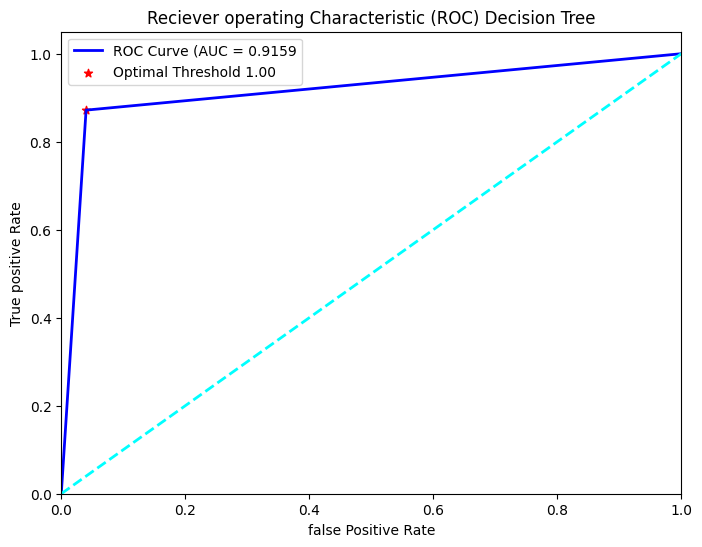

In [73]:
####  Plot ROC Curve

### Compute FPR, TPR at different Threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_test_prob_dt)

### Compute Area under Curve (AUC)

roc_auc = auc(fpr, tpr)

### Compute  Youden J Statistic

y_j = tpr-fpr

optimal_threshold_index = np.argmax(y_j)
optimal_threshold = threshold[optimal_threshold_index]
print(f'Optimal Threshold : {optimal_threshold:.4f}')


#### Plot ROC curve with Optimal Threshold Marked

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC Curve (AUC = {roc_auc:.4f}')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color = 'red', marker = '*',
            label = f'Optimal Threshold {optimal_threshold:.2f}')
plt.plot([0,1], [0,1], ls = '--', lw = 2, color = 'cyan')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Reciever operating Characteristic (ROC) Decision Tree')
plt.legend()
plt.show()

### Support Vector Machine

It is a supervised machine learning algorithm used for both classification and regression challenges. It is mainly utilized for classification related problems.

- In support vector machine, the required straight line to fit the data is called hyperplane
- The goal of the Support Vector Machine algorithm is the find a hyperplane in an n-dimmensional spance that distinctly classifies the data points
- The closest data points of the hyperplane on either side are called support Vectors
- These Support vector influence the position and orientation of the hyperplane, aiding in the construction of SVM.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/SVM.png)

#### Apply SVM on Breast Cancer Dataset

In [74]:
from sklearn.svm import SVC

In [80]:
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability = True))
])
pipeline.fit(X_train, y_train)

y_pred_train_svm = pipeline.predict(X_train)
y_pred_test_svm = pipeline.predict(X_test)

# Calculate training and testing accuracy
training_accuracy =  accuracy_score(y_train, y_pred_train_svm)
testing_accuracy =  accuracy_score(y_test, y_pred_test_svm)

print("Support Vector Machine")
print('----------------------------------------------')
print(f'Training Accuracy :  {training_accuracy}')
print(f'Testing Accuracy :  {testing_accuracy}')

Support Vector Machine
----------------------------------------------
Training Accuracy :  0.989010989010989
Testing Accuracy :  0.9649122807017544


In [76]:
# predict the probabilities on testin set
y_pred_test_prob_svm =  pipeline.predict_proba(X_test)[:,1]

#Create df of results

results_df =  pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label':y_pred_test_svm,
    'Predicted Probability of 1': np.round(y_pred_test_prob_svm, 4)
})

results_df.tail(10)

,Actual Label,Predicted Label,Predicted Probability of 1
118,1,1,1.0000
205,1,1,0.5907
138,1,1,0.9770
338,0,0,0.0001
389,1,1,0.9962
346,0,0,0.0005
158,0,0,0.0001
53,1,1,1.0000
387,0,0,0.0024
360,0,0,0.0038


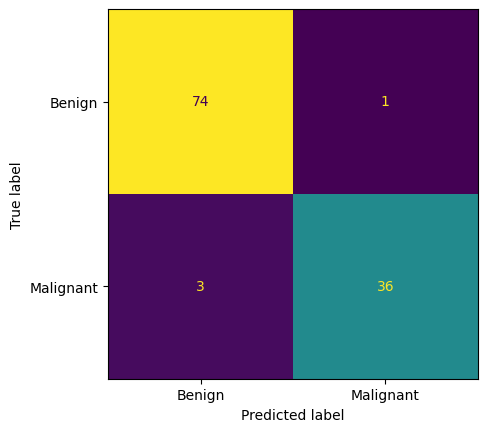

In [77]:
conf_mat_svm = confusion_matrix(y_test, y_pred_test_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat_svm, display_labels = ['Benign', 'Malignant'])
cm_display.plot(colorbar = False)
plt.show()

In [78]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



__HomeWork. Apply All models on multiclass data online gaming behaviour considering engagement level as target value. Find the best suited model and perform hyperparameter tuning of it__

#### Perform hyperparameter for SVC